<a href="https://colab.research.google.com/github/satyamyeola/Optimal-Portfolio-Allocation/blob/main/Assignment1_25b2506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week-1 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly

Also report :
- Asset with highest expected return:
- Asset with highest volatility:
- If there is any negatively correlated pairs (corr < -0.1) and if yes also mention which are they

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment1_yourrollno.ipnyb`


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


In [ ]:
TICKERS = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']  # you can change these take any 3 assets that are in yfinance
print("Selected assets:", TICKERS)


Selected assets: ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']


In [ ]:
prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
prices = prices.xs('Close', axis=1, level=0)
# TO DO :Clean missing values using dropna and fillna
prices.dropna(how="all")
prices.tail(10)

/tmp/ipython-input-2953163072.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
[*********************100%***********************]  3 of 3 completed


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2025-12-02,989.799988,1546.300049,3135.699951
2025-12-03,1000.500000,1538.800049,3180.000000
2025-12-04,997.200012,1535.599976,3229.199951
2025-12-05,1003.299988,1540.599976,3238.199951
2025-12-08,1003.099976,1543.000000,3236.500000
2025-12-09,997.099976,1529.400024,3208.300049
2025-12-10,989.799988,1536.900024,3189.199951
2025-12-11,1000.299988,1545.000000,3191.899902
2025-12-12,1001.500000,1556.500000,3220.500000


In [ ]:
# TO DO : Simple Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
simple_returns = prices.pct_change()

# TO DO : Log Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
log_returns = np.log(prices / prices.shift(1))

print("\nSimple Returns :")
display(simple_returns.head(10))

print("\nLog Returns :")
display(log_returns.head(10))


Simple Returns :


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-15,NaN,NaN,NaN
2022-12-16,0.004811,-0.004945,-0.019621
2022-12-19,0.003110,0.013135,-0.011789
2022-12-20,-0.006901,0.008656,0.013085
2022-12-21,-0.009673,-0.014227,0.007583
2022-12-22,-0.003431,-0.002592,-0.002708
2022-12-23,-0.008933,-0.029327,-0.009617
2022-12-26,0.019904,0.008732,0.007604
2022-12-27,0.001013,0.008181,0.002029



Log Returns :


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-15,NaN,NaN,NaN
2022-12-16,0.004799,-0.004957,-0.019816
2022-12-19,0.003106,0.013050,-0.011859
2022-12-20,-0.006925,0.008619,0.013000
2022-12-21,-0.009720,-0.014329,0.007555
2022-12-22,-0.003437,-0.002596,-0.002711
2022-12-23,-0.008973,-0.029766,-0.009664
2022-12-26,0.019709,0.008694,0.007576
2022-12-27,0.001012,0.008148,0.002027


In [ ]:
TRADING_DAYS = 252

# TO DO : Annual expected return (mean log return × 252)
expected_return =log_returns.mean() * TRADING_DAYS

# TO DO : Annualized volatility (std of returns × sqrt(252))
volatility =log_returns.std() * sqrt(TRADING_DAYS)

print("\n Annualized Expected Return")
display(expected_return)

print("\n Annualized Volatility (Risk)")
display(volatility)


 Annualized Expected Return


,0
Ticker,
HDFCBANK.NS,0.080922
RELIANCE.NS,0.094975
TCS.NS,0.022200



 Annualized Volatility (Risk)


,0
Ticker,
HDFCBANK.NS,0.185866
RELIANCE.NS,0.200700
TCS.NS,0.196551


In [ ]:
# TO DO : Covariance (annualized)- first find daily covariance (using log return) and then find the annual covariance
cov_daily =log_returns.cov()
cov_annual =cov_daily * TRADING_DAYS

# TO DO : Correlation matrix
corr =log_returns.corr()

print("\n Covariance Matrix (Annualized) ")
display(cov_annual)

print("\n Correlation Matrix ")
display(corr)



 Covariance Matrix (Annualized) 


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Ticker,,,
HDFCBANK.NS,0.034546,0.013653,0.005215
RELIANCE.NS,0.013653,0.040281,0.010977
TCS.NS,0.005215,0.010977,0.038632



 Correlation Matrix 


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Ticker,,,
HDFCBANK.NS,1.000000,0.366007,0.142764
RELIANCE.NS,0.366007,1.000000,0.278262
TCS.NS,0.142764,0.278262,1.000000


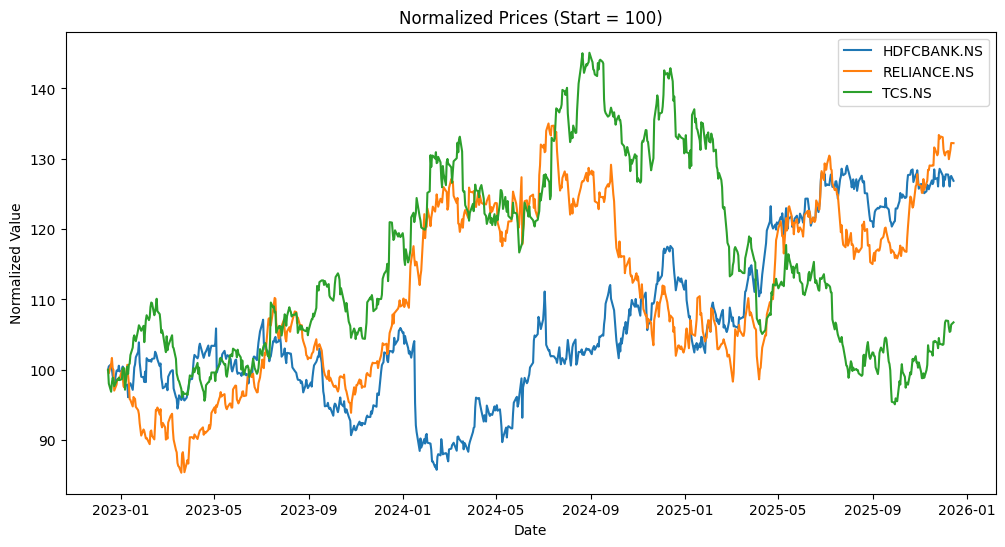

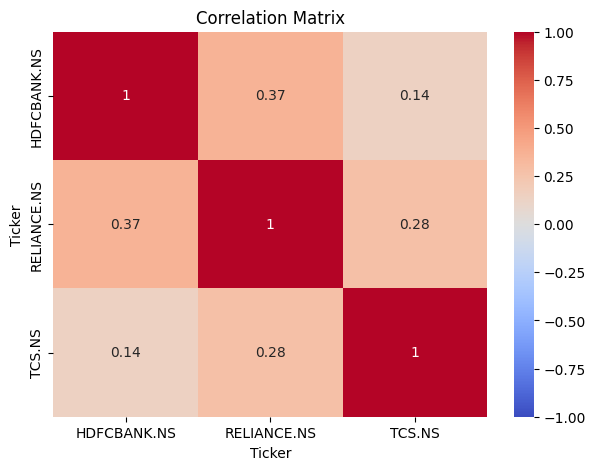

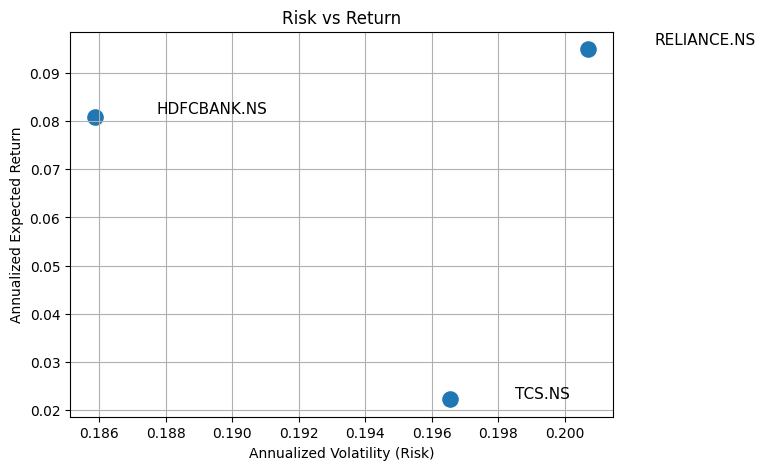

In [ ]:
#Visualization
norm_prices = prices / prices.iloc[0] * 100
plt.figure(figsize=(12,6))
for col in norm_prices.columns:
    plt.plot(norm_prices.index, norm_prices[col], label=col)

plt.title("Normalized Prices (Start = 100)")
plt.ylabel("Normalized Value")
plt.xlabel("Date")
plt.legend()
plt.show()

# 2) Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# 3) Risk vs Return Scatter
plt.figure(figsize=(7,5))
plt.scatter(volatility, expected_return, s=120)

for t in TICKERS:
    plt.text(volatility[t]*1.01, expected_return[t]*1.01, t, fontsize=11)

plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Expected Return")
plt.title("Risk vs Return")
plt.grid(True)
plt.show()

RELIANCE.NS has the highest annual expected return.
TCS.NS has the highest volatility.
There are no negatively correlated pairs among the three selected assets.